# Create Dataset

In [1]:
from PIL import Image
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pickle
import sat_utils
import tifffile as tiff

input: (8, 650, 650)
input2: (650, 650, 8)
target: (3, 650, 650)


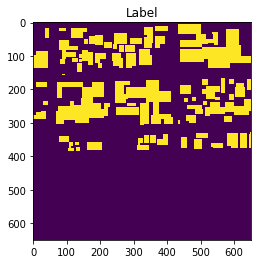

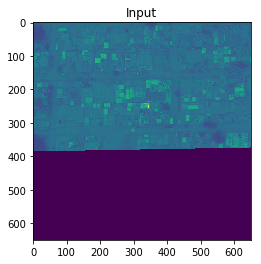

input: (8, 650, 650)
target: (3, 650, 650)


In [2]:
target = sat_utils.load_map_tiff('MUL-PanSharpen_AOI_5_Khartoum_img16_target.tif')
input = sat_utils.load_map_tiff('MUL-PanSharpen_AOI_5_Khartoum_img16_input.tif')

# Open same image with channels inverted
input2 = tiff.imread('MUL-PanSharpen_AOI_5_Khartoum_img16_input.tif').astype(np.float32)

print('input:', input.shape)
print('input2:', input2.shape)
print('target:', target.shape)

plt.imshow(target[0,:,:])
plt.title('Label');
plt.show()

plt.imshow(input[4,:,:])
plt.title('Input');
plt.show()

print('input:', input.shape)
print('target:', target.shape)

#### Crop and Display

Original: (3, 650, 650)
Cropped: (3, 76, 76)
Max target: 255.0
Min target: 0.0


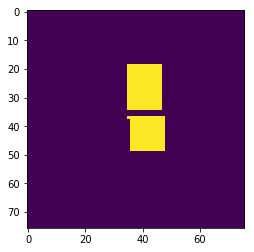

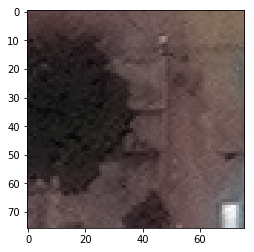

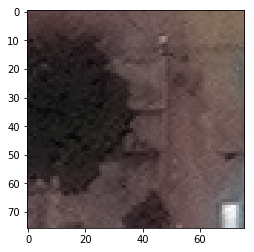

Original: (8, 650, 650)
Cropped: (8, 76, 76)


In [3]:
crop_target = sat_utils.crop_img(target,0,0,76,76)
print('Original:',target.shape)
print('Cropped:',crop_target.shape)
print('Max target:', np.max(target))
print('Min target:', np.min(target))
plt.imshow(crop_target[0,:,:])
plt.show()

#crop_input = utils.crop_img(input,0,0,76,76)
#crop_input = utils.get_rgb(input2)

#rgb = utils.get_rgb(input2, channelsFirst=False)
#rgb = np.dstack((input2[:, :, 4], input2[:, :, 2], input2[:, :, 1]))

crop_input2 = sat_utils.crop_img(input2,0,0,76,76, channelsFirst=False)
rgb2 = sat_utils.get_rgb(crop_input2, channelsFirst=False)
rgb_norm2 = sat_utils.img_minmax_norm(rgb2, channelsFirst=False)
plt.imshow( rgb_norm2 )
plt.show()

crop_input1 = sat_utils.crop_img(input,0,0,76,76, channelsFirst=True)
rgb1 = sat_utils.get_rgb(crop_input1, channelsFirst=True)
rgb_norm1 = sat_utils.img_minmax_norm(rgb1, channelsFirst=True)
rgb_norm1 = np.moveaxis(rgb_norm1, 0, 2)
plt.imshow( rgb_norm1 )
plt.show()
print('Original:',input.shape)
print('Cropped:',crop_input1.shape)

img_1_input.png


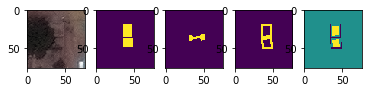

img_2_input.png


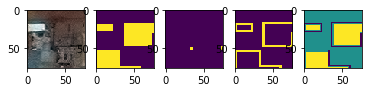

img_3_input.png


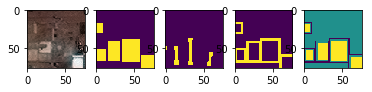

img_4_input.png


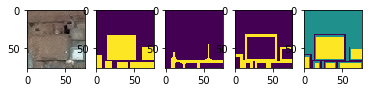

img_5_input.png


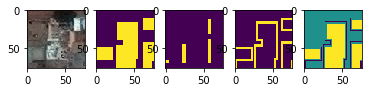

img_6_input.png


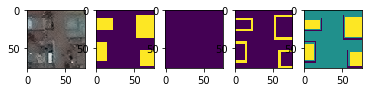

img_7_input.png


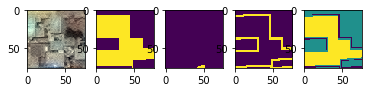

img_8_input.png


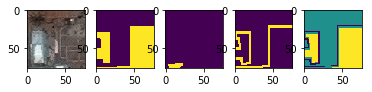

img_9_input.png


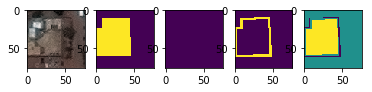

img_10_input.png


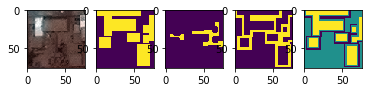

img_11_input.png


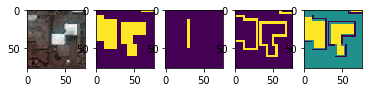

img_12_input.png


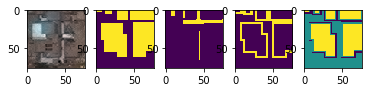

img_13_input.png


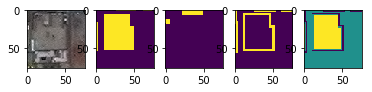

img_14_input.png


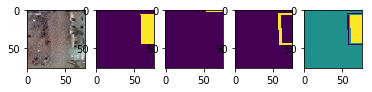

img_15_input.png


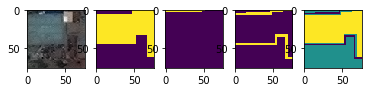

img_16_input.png


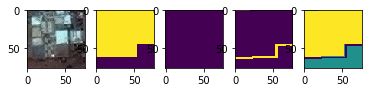

img_17_input.png


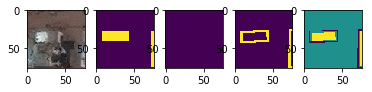

img_18_input.png


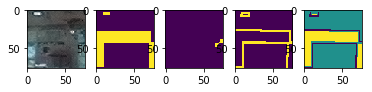

img_19_input.png


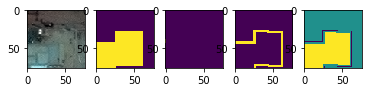

img_20_input.png


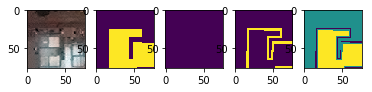

img_21_input.png


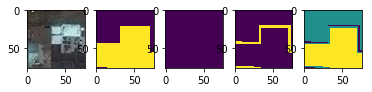

img_22_input.png


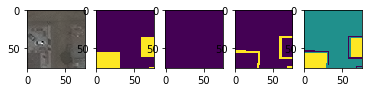

img_23_input.png


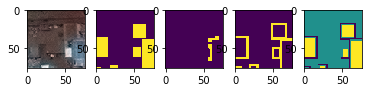

img_24_input.png


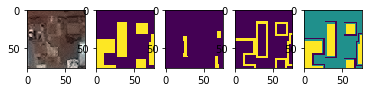

img_25_input.png


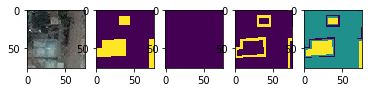

img_26_input.png


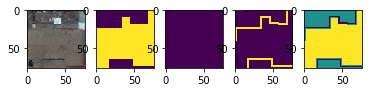

img_27_input.png


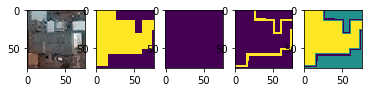

img_28_input.png


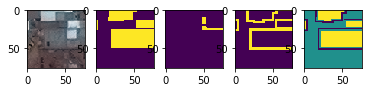

img_29_input.png


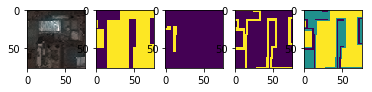

img_30_input.png


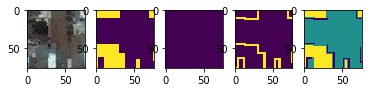

img_31_input.png


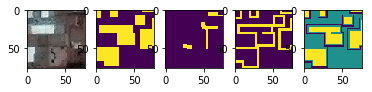

img_32_input.png


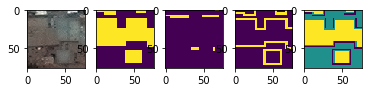

img_33_input.png


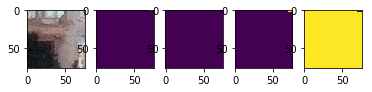

img_34_input.png


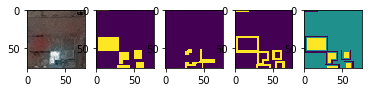

img_35_input.png


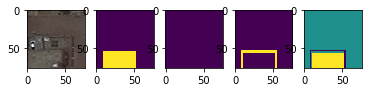

img_36_input.png


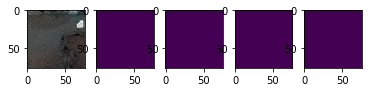

img_37_input.png


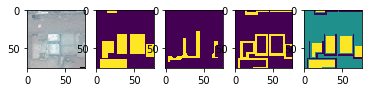

img_38_input.png


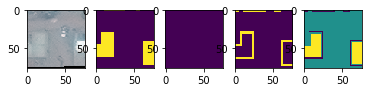

img_39_input.png


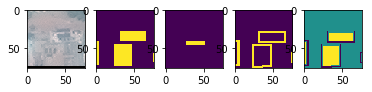

In [4]:
dict_input, dict_output = sat_utils.crop_blocks(input, target, display=True, earlyStop=39)

### Save images to Pickle

In [6]:
with open('./data/input.pickle', 'wb') as handle:
    pickle.dump(dict_input, handle)

with open('./data/label.pickle', 'wb') as handle:
    pickle.dump(dict_output, handle)
    

In [ ]:
import os
import natsort as ns
import rasterio
import numpy as np
import sat_utils
import pickle

folder_path='./data/images'


input_paths_dict={}
target_paths_dict={}
for root, dirs, files in os.walk(folder_path):
        files = ns.natsorted(files)
        for file in files[0::]:
            img_path = os.path.join(root, file)
            parts = os.path.splitext(file)[0].split('_')
            img_id = parts[-2]
                       
            if parts[-1]=="input":
                input_paths_dict[img_id] = img_path
            if parts[-1]=="target":
                target_paths_dict[img_id] = img_path
            
all_input_dict={}
all_target_dct={}
count=0
for key, value in input_paths_dict.items():
    
    input = sat_utils.load_map_tiff(value)
    target = sat_utils.load_map_tiff(target_paths_dict[key])
    print(input.shape)
    print(input.max())

    print(target.shape)
    print(target.max())
    
    dict_input, dict_output = sat_utils.crop_blocks(input, target, display=False, earlyStop=3, offset=count*3)
    all_input_dict.update(dict_input)
    all_target_dct.update(dict_output)
    print(len(all_input_dict))
    count+=1

    
with open('./data/all_input.pickle', 'wb') as handle:
    pickle.dump(all_input_dict, handle)

with open('./data/all_label.pickle', 'wb') as handle:
    pickle.dump(all_target_dct, handle)
    
print(len(all_input_dict))
print(len(all_target_dct))